## Import Dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
%matplotlib inline

## Read CSV File

In [2]:
dataSet = pd.read_csv("housePricing.csv")

In [3]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## DataSet Redifine

In [4]:
numerical = ["SalePrice","Lot Area","Overall Qual","Overall Cond",
             "1st Flr SF","2nd Flr SF","Bedroom AbvGr"]

categorical = [
  'MS Zoning', 'Lot Shape', 'Neighborhood', 'Central Air', 'Sale Condition', 'Mo Sold', 'Yr Sold'
]

dataSet = dataSet[numerical+categorical]

dataSet.shape


(2930, 14)

## SeaBorn Histagram

c:\users\murth\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


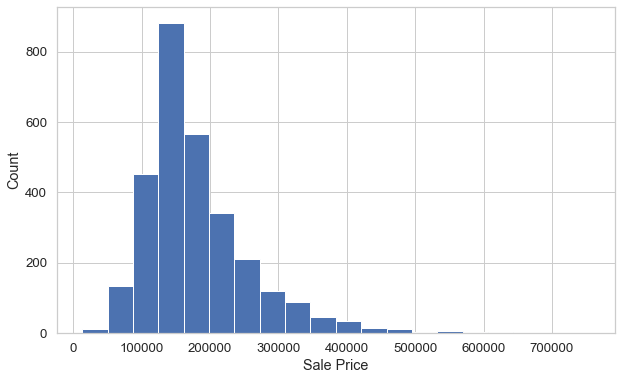

In [5]:
sb.set(style='whitegrid', palette="deep", font_scale=1.2, rc={"figure.figsize": [10, 6]})
sb.distplot(
    dataSet['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

## Analyse using Pandas Ploting to visualise Histgram

array([[<AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>,
        <AxesSubplot:title={'center':'Overall Cond'}>],
       [<AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Bedroom AbvGr'}>, <AxesSubplot:>]],
      dtype=object)

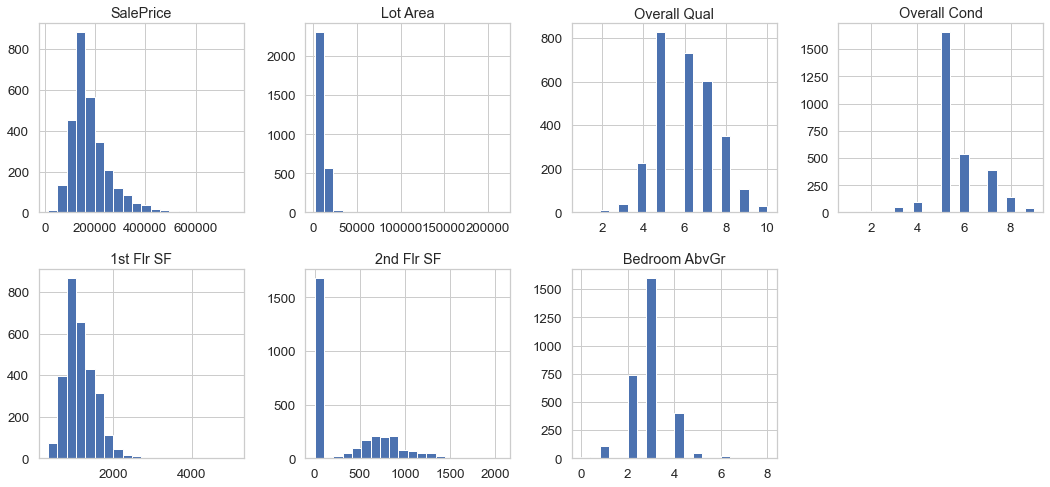

In [6]:
dataSet[numerical].hist(bins=20,figsize = (18,8),layout=(2,4))

## Analyse Sale Condition with object varialble

c:\users\murth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sale Condition', ylabel='count'>

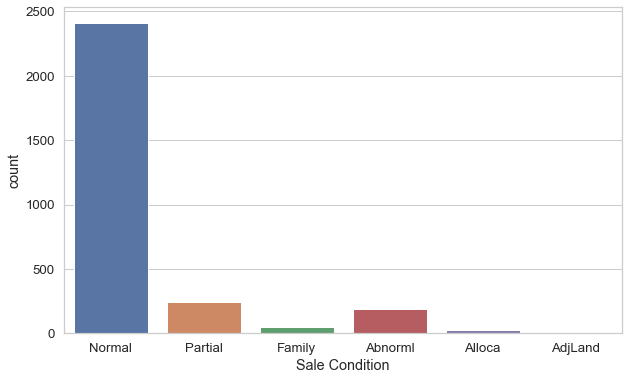

In [7]:
sb.countplot(dataSet["Sale Condition"])

## Analyse through all Object Variables

c:\users\murth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\murth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\murth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

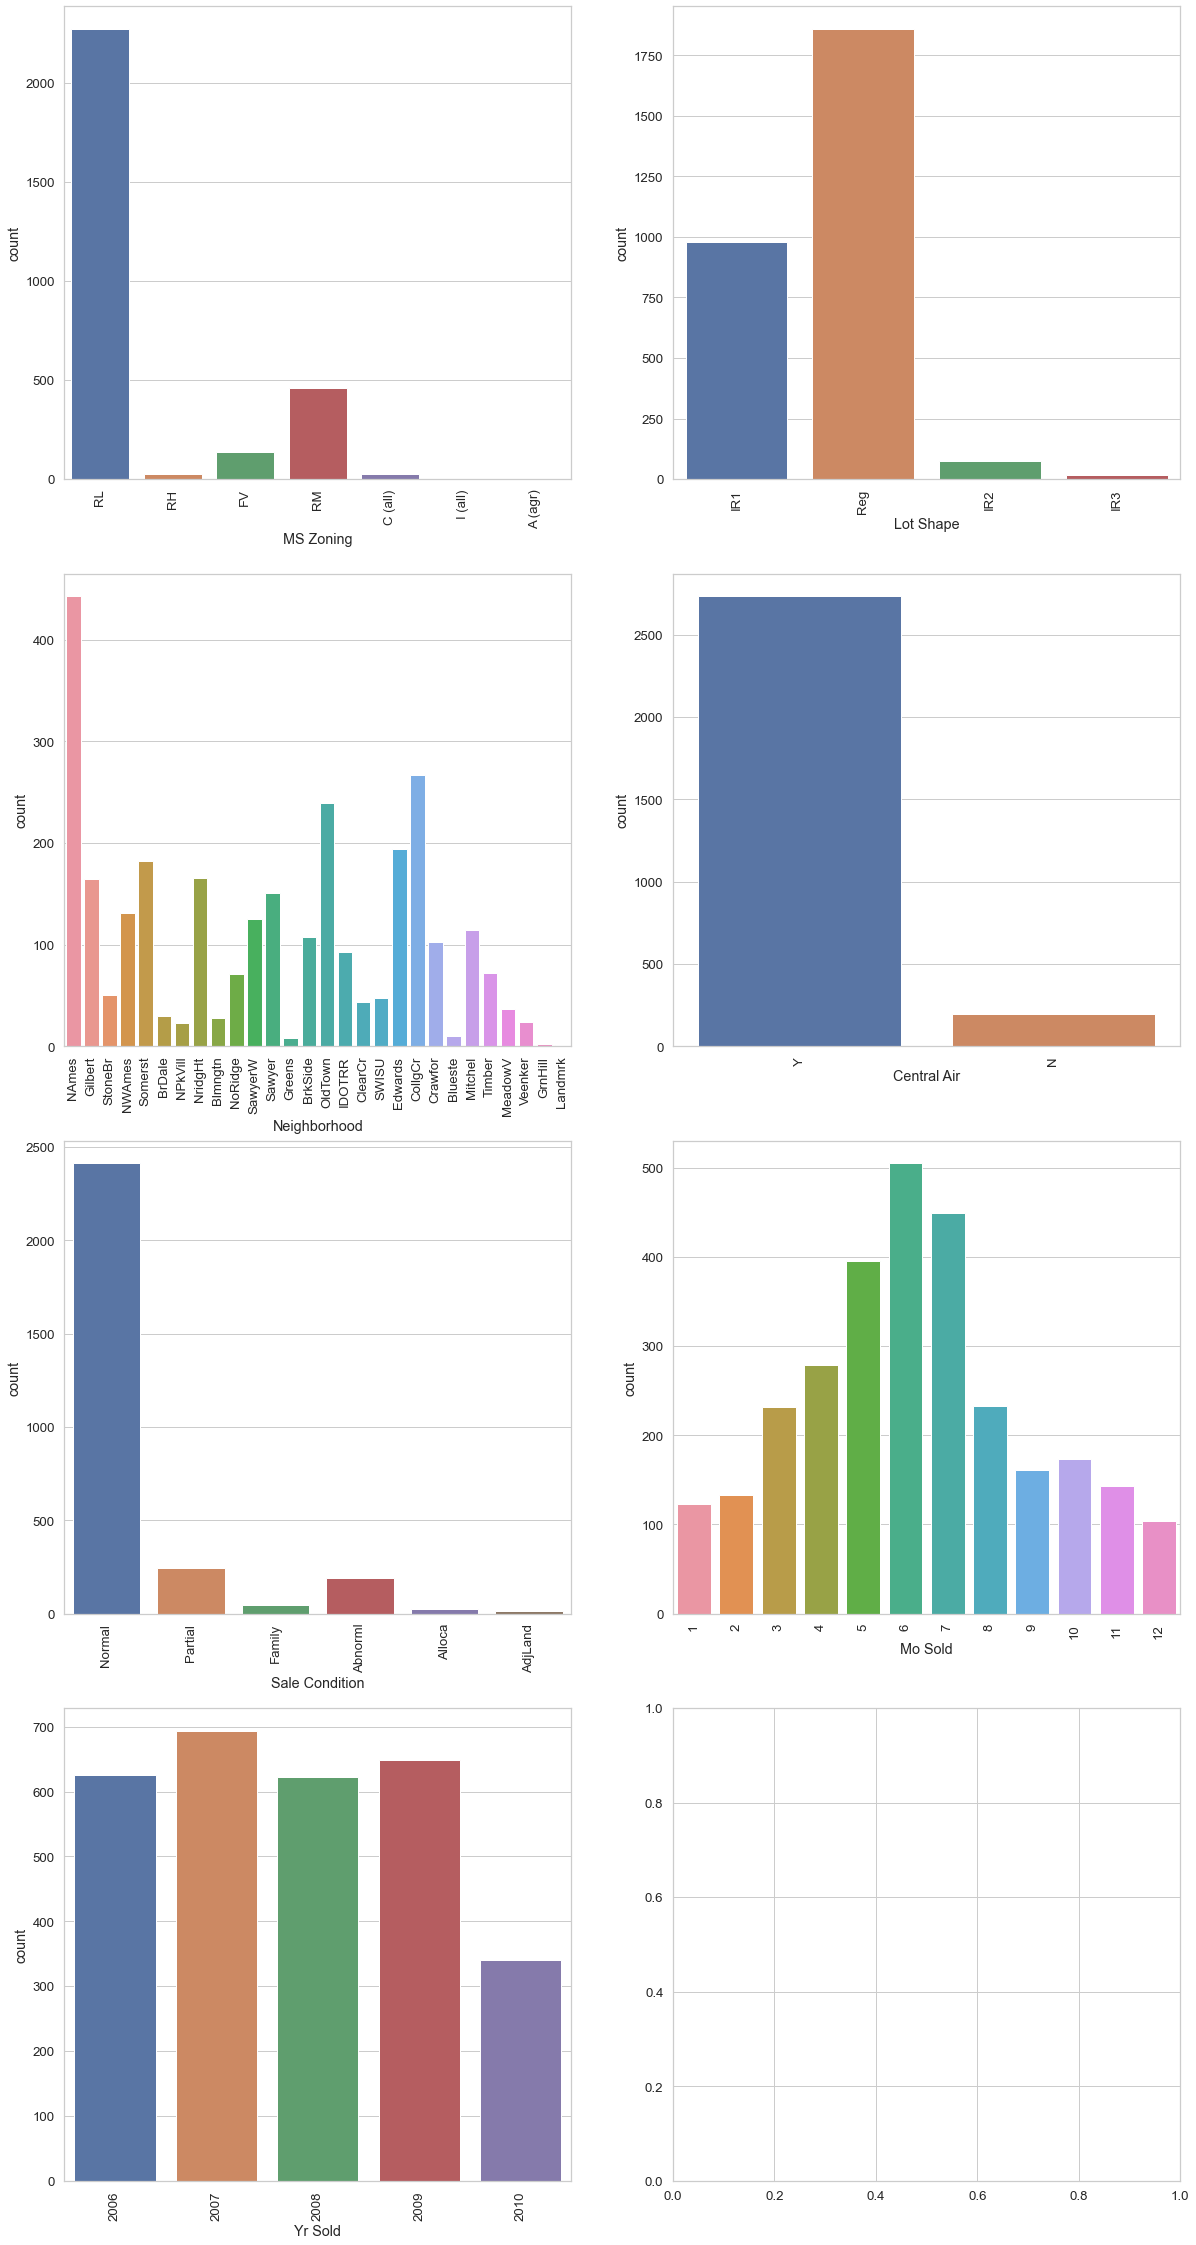

In [8]:
fig, ax = pt.subplots(4, 2, figsize=(20, 40))
for variable, subplot in zip(categorical, ax.flatten()):
    sb.countplot(dataSet[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


## Analyse the relation between numercal variables

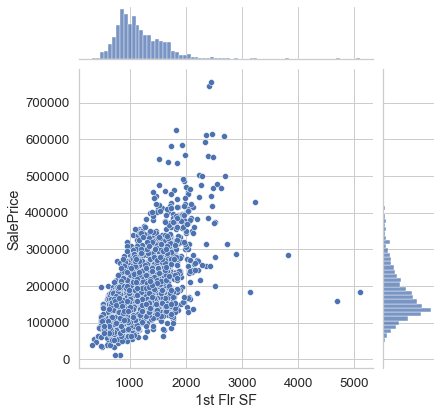

In [9]:
sb.jointplot(x=dataSet["1st Flr SF"],y=dataSet['SalePrice'],dropna=True,)

## Analyse Relation between Numerical and Catogarical Variables

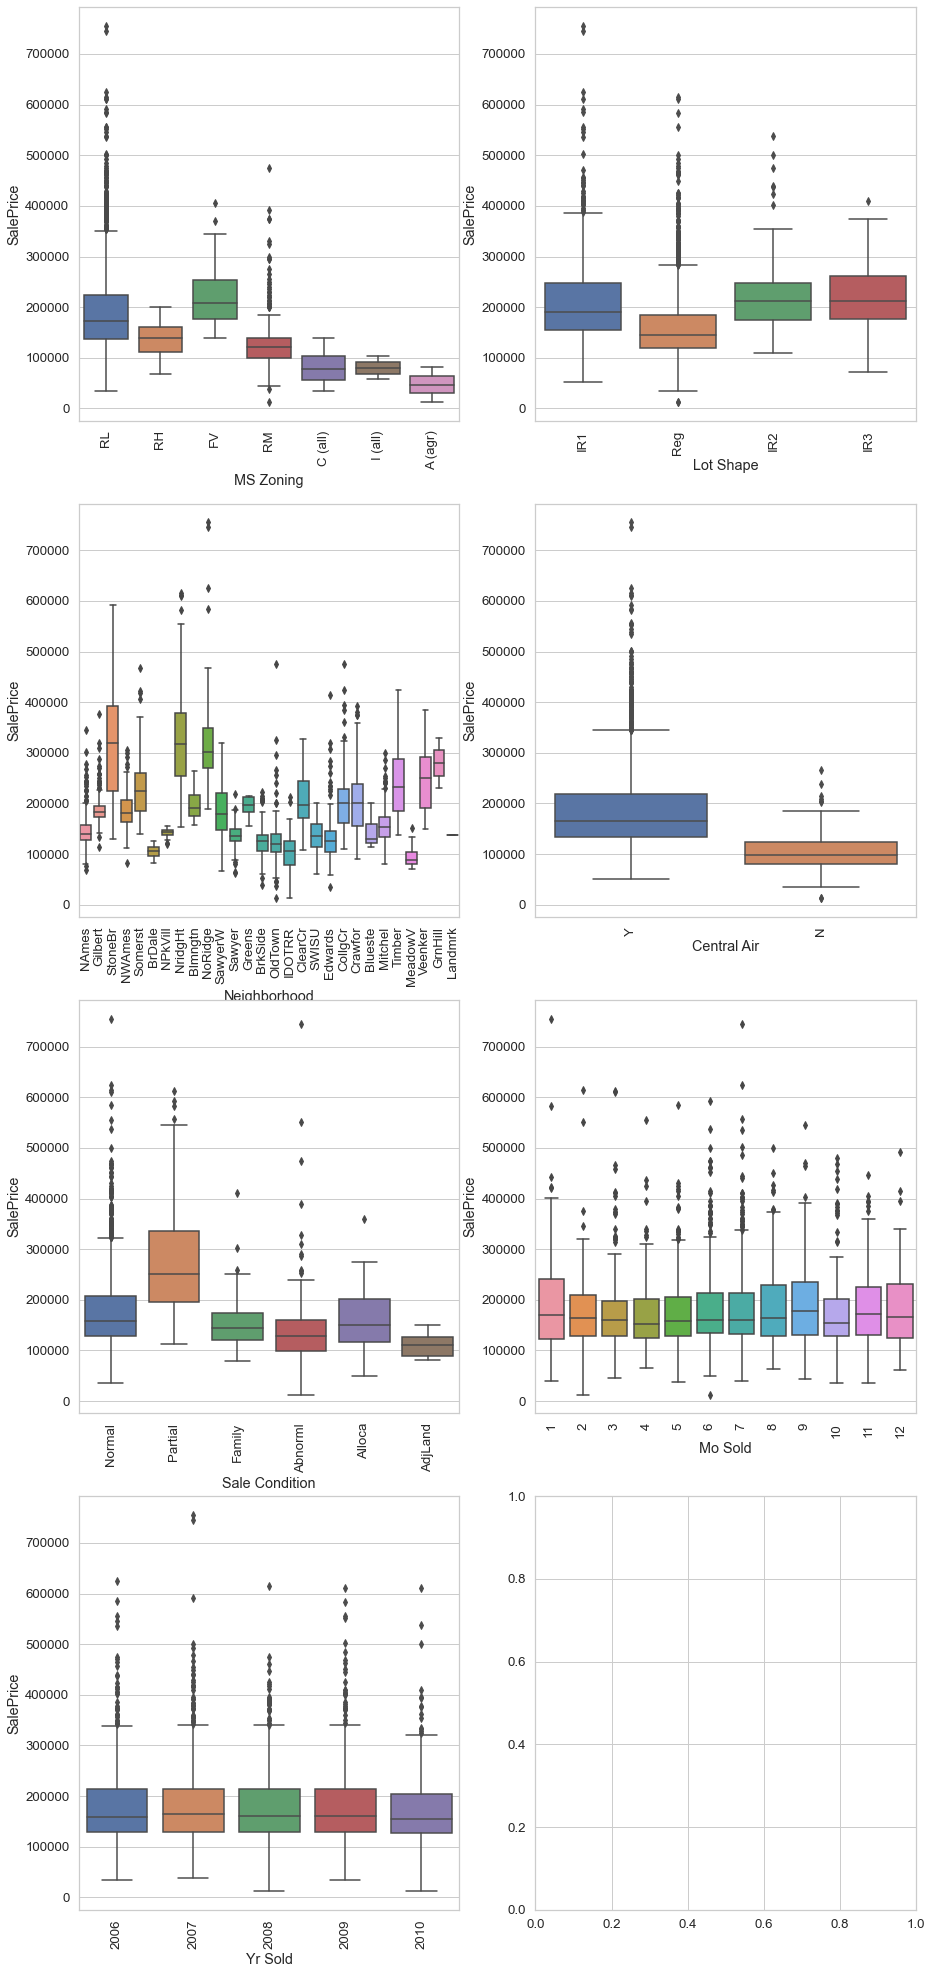

In [10]:
fig, ax = pt.subplots(4,2,figsize=(15,35))
for var, subplot in zip(categorical,ax.flatten()):
    sb.boxplot(x=var,y='SalePrice',data=dataSet,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

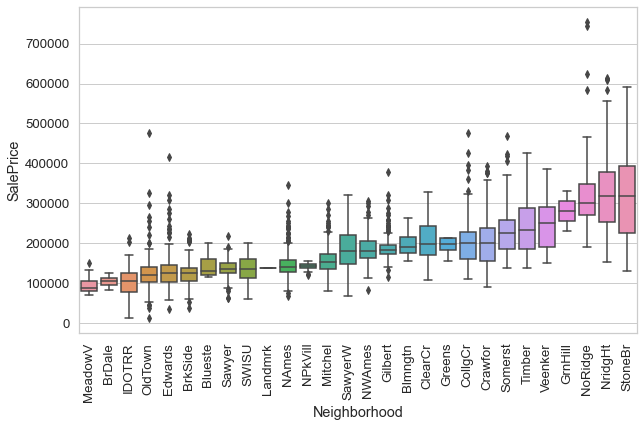

In [11]:
sorted = dataSet.groupby(["Neighborhood"])["SalePrice"].median().sort_values()
boxer = sb.boxplot(x=dataSet["Neighborhood"],y=dataSet["SalePrice"],order=list(sorted.index))
for label in boxer.get_xticklabels():
        label.set_rotation(90)

## FacetGrid To Analyse

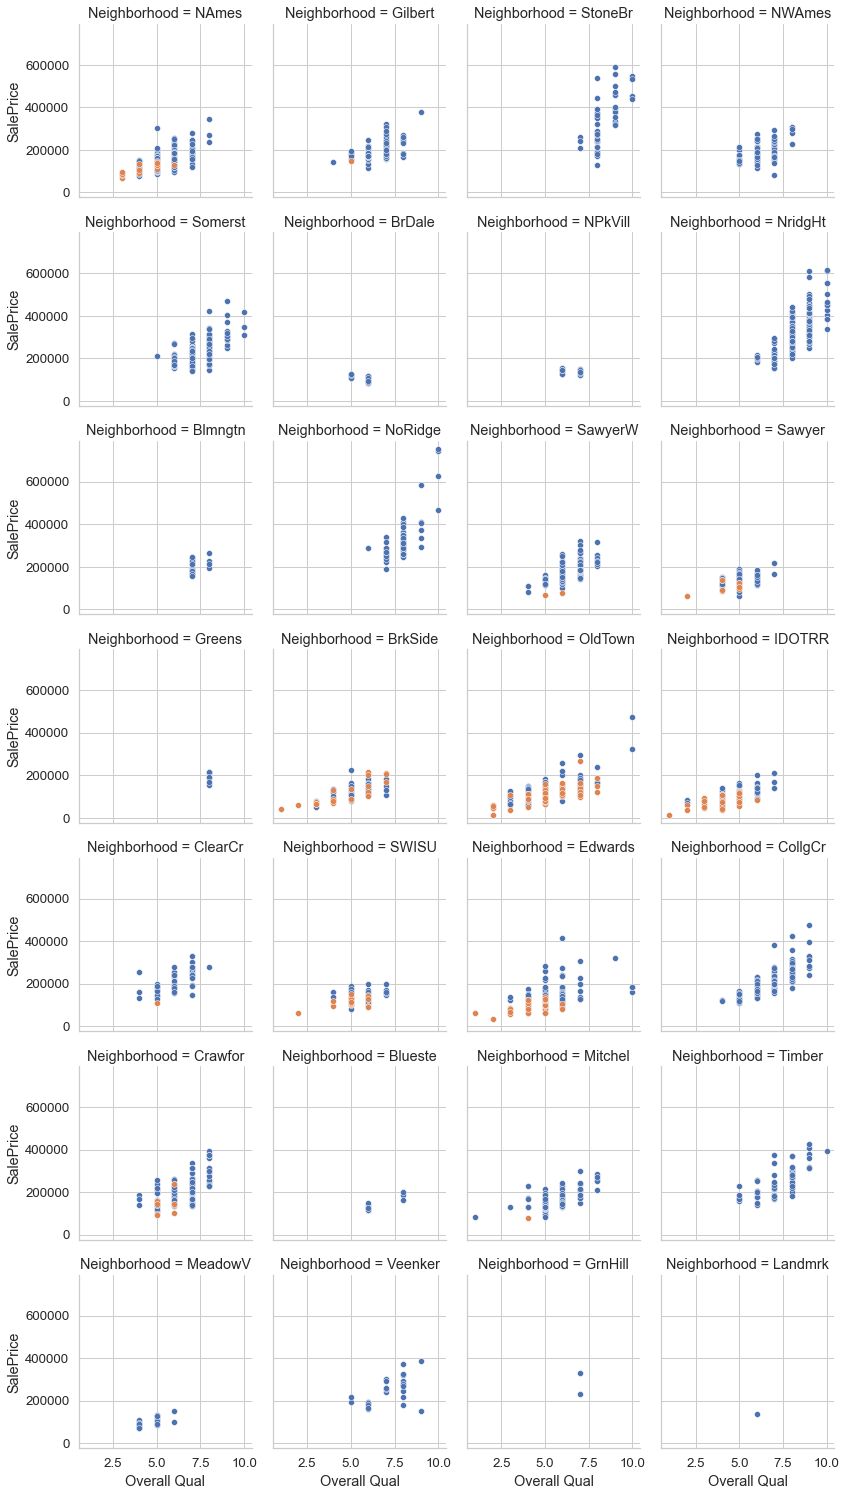

In [12]:
grid = sb.FacetGrid(data=dataSet, col="Neighborhood",hue="Central Air",col_wrap=4 )
grid.map( sb.scatterplot, "Overall Qual" , "SalePrice")